## Digit Recognizer

### Problem
**Given images of digits 0-9, we need to predict what number is represented within the image.**

### Notes
- We are using the MNIST dataset. 
- This notebook is created entirely for practice for basic topics within Machine Learning.
- Credit goes to https://www.kaggle.com/c/digit-recognizer/ for the tutorial and idea


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Preprocessing Data
1. We need to create dataframes for our test and train data
2. We need to separate the answer label from the pixel values within the dataframes
3. We further look at visualizations of the images

In [4]:
#Create dataframes for test data and train data
test_df = pd.read_csv("./test.csv")

train_df = pd.read_csv("./train.csv")
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train = train_df.iloc[:,1:].values.astype('float32') 
y_train = train_df.iloc[:,0].values.astype('int32') 

X_test = test_df.values.astype('float32')

Since we know the numbers represented within the images can take 10 different values, this is a **multiclass** classification problem.

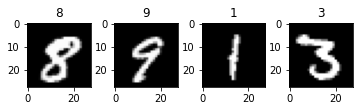

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)

# Replace range(10,14) to look at different examples
for i in range(10, 14):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [7]:
# Lets standardize the data now
mean = X_train.mean()
std = X_train.std()

# Standardizing here we create a random variable X ~ Normal Distribution(mean=0, std=1)
def standardize(x):
    return (x-mean)/std

In [8]:
# Here we transform our answer labels [0-9] to an array of length 10 with a 1 in the position of which 
# what number is represented. 
# Ex. 1 -> [0,1,0,0,0,0,0,0,0,0]
# Ex. [0,0,0,0,0,1,0,0,0,0] -> 5

from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [9]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

### Creating Neural Network

In [10]:
seed = 14
np.random.seed(seed)

In [11]:
from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

In [12]:
model = Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print("input shape ", model.input_shape)
print("output shape ", model.output_shape)

input shape  (None, 28, 28, 1)
output shape  (None, 10)


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 28, 28, 1)         0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [26]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
 loss='categorical_crossentropy',
 metrics=['accuracy'])

In [27]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()

In [28]:
from sklearn.model_selection import train_test_split
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

In [29]:
history = model.fit(X_train, y_train, batch_size = 64, epochs = 3)

Epoch 1/3
591/591 [==============================] - 1s 1ms/step - loss: 0.4426 - accuracy: 0.8679
Epoch 2/3
591/591 [==============================] - 1s 1ms/step - loss: 0.3013 - accuracy: 0.9134
Epoch 3/3
591/591 [==============================] - 1s 1ms/step - loss: 0.2852 - accuracy: 0.9196


In [31]:
results = model.evaluate(X_val, y_val, batch_size=64)

66/66 [==============================] - 0s 1ms/step - loss: 0.3146 - accuracy: 0.9090


In [37]:
predictions = model.predict(X_test)

In [57]:
answers = []
for p in predictions:
    answers.append( (str(max(p)), str(p.tolist().index(max(p)))) )

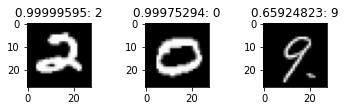

In [60]:
for i in range(0, 3):
    plt.subplot(330 + (i+1))
    plt.imshow(X_test[i], cmap=plt.get_cmap('gray'))
    plt.title(answers[i][0] + ": " + answers[i][1])

# Let's try implementing a NN from scratch (without keras)